# 6.4 Supervised Machine Learning: Regression

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [73]:
df.isnull().sum()

iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [38]:
# import dataframe

df = pd.read_csv(r'file:///Users/Celona/Downloads/country_vaccinations.csv', index_col = 0)

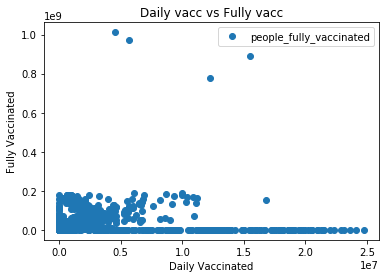

In [74]:
# create scatterplot

df.plot(x = 'daily_vaccinations', y = 'people_fully_vaccinated', style = 'o')
plt.title('Daily vacc vs Fully vacc')
plt.xlabel('Daily Vaccinated')
plt.ylabel('Fully Vaccinated')
plt.show()

# Hypothesis

## If there are more daily vaccinations given then more people will be fully vaccinated.

In [75]:
# reshaping variables into numpy arrays

X = df['daily_vaccinations'].values.reshape(-1,1)
y = df['people_fully_vaccinated'].values.reshape(-1,1)

In [76]:
X

array([[     0.],
       [     0.],
       [     0.],
       ...,
       [ 48405.],
       [ 55055.],
       [108486.]])

In [77]:
y

array([[      0.],
       [      0.],
       [      0.],
       ...,
       [1927168.],
       [1963979.],
       [2033752.]])

In [78]:
# split data into a training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
# create regression object

regression = LinearRegression()

In [80]:
# fit the regression object on the training set

regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# predicted the values of y using X

y_predicted = regression.predict(X_test)

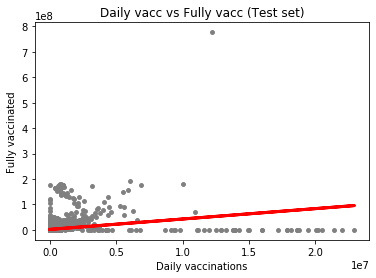

In [82]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Daily vacc vs Fully vacc (Test set)')
plot_test.xlabel('Daily vaccinations')
plot_test.ylabel('Fully vaccinated')
plot_test.show()

In [83]:
# create objects that contain the model summary stats

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [84]:
# print the model summary stats.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.08554391]]
Mean squared error:  165622264870329.7
R2 score:  0.05039466451912822


### There is a small relationship between the two variables but the mean squared error is beyond a large number so there may be an error.

In [85]:
y_predicted

array([[2024316.87669073],
       [2024316.87669073],
       [2024316.87669073],
       ...,
       [2396023.74691413],
       [2040524.2293707 ],
       [2024316.87669073]])

In [87]:
# create dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,2.024317e+06
1,0.0,2.024317e+06
2,0.0,2.024317e+06
3,0.0,2.024317e+06
4,0.0,2.024317e+06
5,11919.0,2.032815e+06
6,0.0,2.024317e+06
7,1.0,2.024333e+06
8,0.0,2.024317e+06
9,0.0,2.024317e+06


In [88]:
# predict

y_predicted_train = regression.predict(X_train)

In [89]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [90]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.08554391]]
Mean squared error:  206125676419330.66
R2 score:  0.06073877606823208


### There may be some bias with the dataset that affects the relationship between variables. 